In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import afqinsight as afqi
import numpy as np
import seaborn as sns

In [14]:
afqi.AFQDataset?

In [5]:
data = afqi.AFQDataset(fn_nodes='../data/raw/combined_tract_profiles.csv', fn_subjects = '../data/raw/participants_updated_id.csv', 
                       dwi_metrics=['dki_fa', 'dki_md'], target_cols=['age'], index_col="subject_id")

In [20]:
len(data.subjects)

1878

In [6]:
nan_mask = np.isnan(data.y)
y = data.y[~nan_mask]
X = data.X[~nan_mask]
subjects = list(np.array(data.subjects)[~nan_mask])

In [7]:
df = pd.read_csv('../data/raw/participants.csv')
df['subject_id'] = df['subject_id'].apply(lambda s: s.replace('sub-', ''))
df.to_csv('../data/raw/participants_updated_id.csv', index=False)

In [9]:
# type(data)
data.group_names.index(('dki_md', 'ARC_R'))

<bound method NDFrame.head of         subject_id scan_site_id  expert_qc_score  xgb_qc_score  dl_qc_score  \
0     NDARAA306NT2           RU              NaN         0.850        0.470   
1     NDARAA536PTU           SI              NaN           NaN        0.701   
2     NDARAA947ZG5         CBIC              NaN         0.576        0.509   
3     NDARAA948VFH           RU              NaN         0.990        0.979   
4     NDARAB055BPR           RU              NaN         0.091        0.035   
...            ...          ...              ...           ...          ...   
2130  NDARZW873DN3         CBIC              NaN         0.979        0.982   
2131  NDARZX163EWC         CBIC              NaN         0.950        0.993   
2132  NDARZY101JNB         CBIC              NaN         0.975        0.992   
2133  NDARZZ740MLM           RU              NaN         0.030        0.014   
2134  NDARZZ810LVF         CBIC              NaN         0.889        0.861   

     sex        age  

In [32]:
data.X.shape

(1878, 4800)

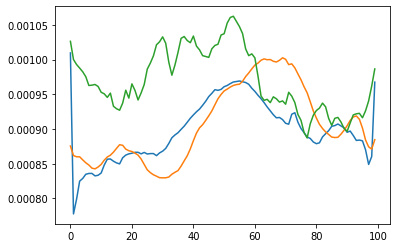

In [33]:
_ = plt.plot(data.X[:3,2500:2600].T)

In [36]:
tf_data = data.as_tensorflow_dataset()

In [44]:
len([x for x in tf_data.as_numpy_iterator()])

1878

In [53]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

In [49]:
pipeline = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('scale', StandardScaler()),
                     ('pca', PCA(n_components=100)),
                     ('model', LassoCV())])

In [50]:
pipeline.fit(X, y)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler()), ('pca', PCA(n_components=100)),
                ('model', LassoCV())])

In [51]:
pipeline.score(X,y)

0.611013575556059

In [54]:
scores = cross_validate(pipeline,X,y)

In [55]:
scores

{'fit_time': array([1.93298411, 1.90661025, 1.89340281, 1.90740609, 1.8834281 ]),
 'score_time': array([0.07948089, 0.06913495, 0.07133198, 0.07010198, 0.07295895]),
 'test_score': array([0.5631172 , 0.54565565, 0.53553785, 0.5730639 , 0.48406495])}